In [84]:
import basics
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import urllib
from urllib.parse import quote
import string
from shapely.geometry import Point 
from shapely.geometry import Polygon
from shapely.geometry import LineString
from shapely.geometry import MultiPolygon
import pyproj
import time
import random
import importlib
importlib.reload(basics)

<module 'basics' from 'F:\\study1\\研一\\兴趣面数据采集\\basics.py'>

In [2]:
# 功能：采集行政区域边界
# 返回保存边界信息的BoundryWithAttr对象
def getDistrictBoundry(ak,citycode):
    districtBoundryUrl = "http://restapi.amap.com/v3/config/district?key="+ak+"&keywords="+citycode+"&subdistrict=0&extensions=all"
    print(districtBoundryUrl)
    districtBoundryUrl = quote(districtBoundryUrl, safe=string.printable)
    json_obj = urllib.request.urlopen(districtBoundryUrl)
#     json_obj = response.read().decode('utf-8','ignore').replace(u'\xa9', u'')
    json_data=json.load(json_obj)
    districts=json_data['districts']
    try:
        polyline = districts[0]['polyline']
        centerLon=districts[0]['center'].split(',')[0]
        centerLat=districts[0]['center'].split(',')[1]
    except Exception as e:
        print("error!")
    pointscoords=polyline.split(';')
    point=basics.PointWithAttr(0,centerLon,centerLat,"行政区域",citycode)
    districtBoundry=basics.BoundryWithAttr(point,pointscoords)
    return districtBoundry

In [3]:
ak = "146e2bfd2ab038f962a212a71a923c0e"
citycodes={'上城区':'330102','下城区':'330103','江干区':'330104',"拱墅区":'330105',"西湖区":'330106','滨江区':'330108',
           '萧山区':'330109','余杭区':'330110','富阳区':'330111','临安区':'330112','桐庐县':'330122','淳安县':'330127',
          '建德市':'330182'}
polygon_list = []
centerX_list = []
centerY_list = []
for citycode in citycodes.keys():
    districtBoundry = getDistrictBoundry(ak,citycode)
    tmp = districtBoundry.boundrycoords
    for i in range(len(tmp)):
        tmp[i] = [float(tmp[i].split(',')[0]) , float(tmp[i].split(',')[1])]
    tmp = Polygon(tmp)
    polygon_list.append(tmp)
    centerX_list.append(districtBoundry.point.lon)
    centerY_list.append(districtBoundry.point.lat)

http://restapi.amap.com/v3/config/district?key=146e2bfd2ab038f962a212a71a923c0e&keywords=上城区&subdistrict=0&extensions=all
http://restapi.amap.com/v3/config/district?key=146e2bfd2ab038f962a212a71a923c0e&keywords=下城区&subdistrict=0&extensions=all
http://restapi.amap.com/v3/config/district?key=146e2bfd2ab038f962a212a71a923c0e&keywords=江干区&subdistrict=0&extensions=all
http://restapi.amap.com/v3/config/district?key=146e2bfd2ab038f962a212a71a923c0e&keywords=拱墅区&subdistrict=0&extensions=all
http://restapi.amap.com/v3/config/district?key=146e2bfd2ab038f962a212a71a923c0e&keywords=西湖区&subdistrict=0&extensions=all
http://restapi.amap.com/v3/config/district?key=146e2bfd2ab038f962a212a71a923c0e&keywords=滨江区&subdistrict=0&extensions=all
http://restapi.amap.com/v3/config/district?key=146e2bfd2ab038f962a212a71a923c0e&keywords=萧山区&subdistrict=0&extensions=all
http://restapi.amap.com/v3/config/district?key=146e2bfd2ab038f962a212a71a923c0e&keywords=余杭区&subdistrict=0&extensions=all
http://restapi.amap.com/

In [4]:
# 将爬取得到的杭州市行政区保存为shp文件
gdf = {'geometry':polygon_list , 'centerLon':centerX_list , 'centerLat':centerY_list , 
       'name':citycodes.keys(),'adacode':citycodes.values()}
gdf = gpd.GeoDataFrame(gdf , crs = None)
gdf

,geometry,centerLon,centerLat,name,adacode
0,"POLYGON ((120.18806 30.25779, 120.18787 30.253...",120.171465,30.250236,上城区,330102
1,"POLYGON ((120.19986 30.35099, 120.20082 30.349...",120.172763,30.276271,下城区,330103
2,"POLYGON ((120.18806 30.25779, 120.18862 30.264...",120.202633,30.266603,江干区,330104
3,"POLYGON ((120.19986 30.35099, 120.19912 30.350...",120.150053,30.314697,拱墅区,330105
4,"POLYGON ((119.99634 30.18154, 120.00131 30.188...",120.147376,30.272934,西湖区,330106
5,"POLYGON ((120.22106 30.23767, 120.22396 30.236...",120.21062,30.206615,滨江区,330108
6,"POLYGON ((120.72195 30.28632, 120.70566 30.271...",120.27069,30.162932,萧山区,330109
7,"POLYGON ((119.77202 30.54643, 119.77072 30.544...",120.301737,30.421187,余杭区,330110
8,"POLYGON ((119.99634 30.18154, 119.99900 30.182...",119.949869,30.049871,富阳区,330111
9,"POLYGON ((119.23637 29.95097, 119.23640 29.951...",119.715101,30.231153,临安区,330112


<AxesSubplot:>

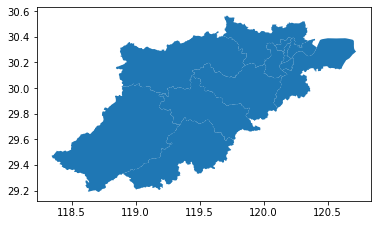

In [5]:
gdf.plot()

In [6]:
gdf.to_file('.\\杭州市行政规划\\杭州市行政区划.shp', encoding="utf-8")

**有一个问题无法解决，网上有人遇到这个问题，但是没有给出解决方案，一旦我把投影更改成epsg:4326之后，就无法成功将gdf写入到shp or geojson等文件中去了。若有大佬解决该问题还请教一下解决方案，谢谢。**

In [7]:
print(gdf.crs)

None


In [8]:
gdf.crs = 'epsg:4326'
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
gdf.to_file('.\\杭州市行政规划\\杭州市行政区划.shp', encoding="utf-8")

CRSError: Invalid input to create CRS: GEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["unknown"],AREA["World"],BBOX[-90,-180,90,180]],ID["EPSG",4326]]

## 抓取公园信息

In [32]:
cookie = "UM_distinctid=17646bf2145191-0bd3e1f96b1ca6-4313f6b-144000-17646bf2146e5; cna=/Sc6GErBNH4CAXQGZDISUCDi; passport_login=MjU3NDQwNTUxLGFtYXBfMTU5NjgxNDgxMTBBNjVTcVdnd2ksaWlmbTRhdHRiNmRkZnRxdGlmanYyN2JmaHVjY3M3bjIsMTYwNzUwNDcxMCxOelZsT1RnNVlqWmhOakE0TURjMU16RXdaakV3TVRVMU1tSm1ORGs0TVdZPQ%3D%3D; dev_help=GvsXc5e0jx4SgvgLKuGQ%2FDJjZjEwMjY5MDUxOTBjZWE1MDg0YTI5OThmZDQ5MjhlYTA5NWI4N2RlYTVmMGZjYmY3YTFhNzBlMzZiYjI5ZjOMRxQ%2FykzULYKvGoJ7CZFMc34o7pX70I6AR%2BMqwAYp0GBIBFlPeDjZZnctSy8cmHXPrZVoJxfIBCeu4pM5ED5f4hSm1Of%2BoKbOAOEigx0zJ2ZBw1NfYBSH%2BeT%2FzCmBrfHFHj1eq3F2yI%2BZ68%2FvGUZv; guid=f4b2-412c-76b1-9e81; gray_auth=2; xlly_s=1; _uab_collina=160810455562183691909055; CNZZDATA1255626299=1360777008-1608099366-https%253A%252F%252Fwww.baidu.com%252F%7C1608110166; x5sec=7b22617365727665723b32223a223166303737633530326635656333383935346265383434646239356630323831434d5448352f3446454b475278365069754b4f6b5a673d3d227d; x-csrf-token=dd81c4e47798d67d1da6ce3e091aaed2; l=eB_VaPkeODOWwq0hBO5aFurza77OzIRbzsPzaNbMiInca6NRUFGsRNQ2C2MB0dtjgtCUxH-zm21B9RFwJNUdgtrsywzdDt9Y9xJO.; isg=BOnp33JbksFTyq58aLLNxB9H-JVDtt3oWfRr14vetVAPUgtkwAZYuIkEFPbkSnUg; tfstk=cUx1BRVUO5VsUkg4bdMF3CWQFv_GZdhCKV19CFcix7ioIpv1i8ZPN2aeoWqdy91.."
refer = "https://ditu.amap.com/search?id=B023B0237B&city=330102&geoobj=114.028154%7C22.393827%7C114.346968%7C22.717579&query_type=IDQ&query=%E6%A8%AA%E6%B2%B3%E5%85%AC%E5%9B%AD&zoom=11.11"
user_agent =  "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36"


In [33]:
def getBoundry(POIList,poitype,writeboundryfile,starti):
    for i in range(starti,len(POIList)):
        poi = POIList[i]
        send_headers={'user-agent': user_agent , 'cookie':cookie ,'refer':refer }
        url="https://ditu.amap.com/detail/get/detail?id="+poi.id
        print(i,poi.id,url)
        req=urllib.request.Request(url,headers=send_headers)
        json_obj=urllib.request.urlopen(req)
        json_data=json.load(json_obj)
#         print(json_data)
        poidata=json_data['data']
        try:
            spec=poidata['spec']
        except Exception as e:
            print(poi.id,poidata)
            continue
        try:
            mining_shape = spec['mining_shape']
        except Exception as e:
            print(poi.id , "无边界")
        else:
            shape = mining_shape['shape']
            coords = shape.split(';')
            coords1=str("|".join(coords))
        try:
            area=mining_shape['area']
        except Exception as e:
            area=-1
            print("无面积")
        # 如果是是居住小区，poi增加容积率和绿化率的字段
        if (poitype == "12302"):
            try:
                poi.volume_rate = str(poidata['deep']['volume_rate'])
            except Exception as e:
                poi.volume_rate = ""
            try:
                poi.green_rate=str(poidata['deep']['green_rate'])
            except Exception as e:
                poi.green_rate = ""
            try:
                poi.sevice_parking=poidata['deep']['sevice_parking']
            except Exception as e:
                poi.service_parking=""
            bf=open(writeboundryfile,'a')
            bf.write(poi.id+";"+poi.type+";"+poi.lon+";"+poi.lat+";"+poi.volume_rate+";"+poi.green_rate+";"+poi.service_parking+\
                    ";"+coords1+"\n")
            bf.close()
        # 如果是公园绿地
        if (poitype == '110100' or poitype == '110101' or poitype == '110102' or poitype == '110103' or
           poitype == '110104' or poitype == '110105' or poitype == '110202' or poitype == '110203'):
            try :
                star = poidata['deep']['src_star']
            except Exception as e:
                print(poi.id , "无评分")
                star = '-1'
            poi.star = str(star)
            poi.area = str(area)
            bf=open(writeboundryfile , 'a')
            bf.write(str(poi.id)+";"+str(poi.type)+";"+str(poi.lon)+";"+str(poi.lat)+";"+str(poi.star)+";"+str(poi.area)+";"+str(coords)+"\n")
            bf.close()
        rand = random.randint(0,30)
        time.sleep(30+rand)

In [34]:
output_directory = "F:\\study1\\研一\\兴趣面数据采集\\"
parksfile = output_directory + "杭州市公园POI.txt"
writeboundryfile = output_directory + "boundry.txt"
poitype = '110101'
POIList = basics.creatpoint(parksfile ,0,3,4,2,1)
getBoundry( POIList ,poitype ,writeboundryfile , 62)

62 B0FFH35BLM https://ditu.amap.com/detail/get/detail?id=B0FFH35BLM


KeyError: 'data'

**通过伪装代理和伪装ip来进行爬取**

In [ ]:
import random
import requests
import re
# 用于获取User_Agent
from fake_useragent import UserAgent
# 获取随机User_Agent伪装
def get_fake_User_Agent():
    # 随机获取User_Agent
    ua = UserAgent()
    user_anget = ua.random
    return user_anget
# 获取IP伪装
def get_fake_IP():
    ip_page = requests.get(  # 获取200条IP
        'http://www.89ip.cn/tqdl.html?num=60&address=&kill_address=&port=&kill_port=&isp=')
    proxies_list = re.findall(
        r'(25[0-5]|2[0-4]\d|[0-1]\d{2}|[1-9]?\d)\.(25[0-5]|2[0-4]\d|[0-1]\d{2}|[1-9]?\d)\.(25[0-5]|2[0-4]\d|[0-1]\d{2}|[1-9]?\d)\.(25[0-5]|2[0-4]\d|[0-1]\d{2}|[1-9]?\d)(:-?[1-9]\d*)',
        ip_page.text)

    # 转换proxies_list的元素为list,最初为'tuple'元组格式
    proxies_list = list(map(list, proxies_list))

    # 格式化ip  ('112', '111', '217', '188', ':9999')  --->  112.111.217.188:9999
    for u in range(0, len(proxies_list)):
        # 通过小数点来连接为字符
        proxies_list[u] = '.'.join(proxies_list[u])
        # 用rindex()查找最后一个小数点的位置，
        index = proxies_list[u].rindex('.')
        # 将元素转换为list格式
        proxies_list[u] = list(proxies_list[u])
        # 修改位置为index的字符为空白（去除最后一个小数点）
        proxies_list[u][index] = ''
        # 重新通过空白符连接为字符
        proxies_list[u] = ''.join(proxies_list[u])

    # proxies = {'协议':'协议://IP:端口号'}
    # 'https':'https://59.172.27.6:38380'
    
    return "'" + random.choice(proxies_list) + "'"

# 解析网址
def get_html(url):
    headers = {
        'User-Agent': get_fake_User_Agent()
    }
    proxies = {'http': get_fake_IP()}
    resp = requests.get(url, headers=headers, proxies=proxies)
    return resp


In [ ]:
url = "https://ditu.amap.com/detail/get/detail?id=B0FFH35BLM"
result = get_html(url)
result

In [ ]:
json_obj = result.json()  # 将结果进行反序列化
# json_data=json.load(json_obj)
json_obj

**上面的两种方法都不行了，高德地图的网站似乎进行了更新，这种通过链接直接爬取的方式已经不行了。而且换ip，伪装代理也不能成功。**

**在网上查到了下面这种爬虫的方式，亲测这种爬虫是可以成功的。**

https://zhuanlan.zhihu.com/p/248626051?utm_source=wechat_timeline

In [22]:
import random
import re
import time

from browsermobproxy import Server
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [23]:
server = Server(r'C:\Users\Administrator\Desktop\browsermob-proxy-2.1.4-bin\browsermob-proxy-2.1.4\bin\browsermob-proxy.bat')
server.start()
proxy = server.create_proxy()

chrome_options = Options()
chrome_options.add_argument('--proxy-server={0}'.format(proxy.proxy))  # 加代理抓包
chrome_options.add_argument('--ignore-certificate-errors')  # 忽略无效证书的问题
driver = webdriver.Chrome(chrome_options=chrome_options)

base_url = 'https://www.amap.com/'
proxy.new_har("amap", options={'captureHeaders': True, 'captureContent': True})
driver.get(base_url)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


In [24]:
input = driver.find_element_by_id('searchipt')    #获取输入框
input.clear()     #清空输入框
input.send_keys("重庆大学B区")    #输入关键词
time.sleep(random.randint(10, 30))

In [25]:
select = driver.find_elements_by_class_name("autocomplete-suggestion")      #获取联想词框
time.sleep(random.randint(2, 5))
select[0].click()          #点击出来的第一个联想词

In [27]:
current_url = driver.current_url
current_url
time.sleep(5) 

In [28]:
result = proxy.har
print(result)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
hhh = re.findall('(\d{3}\.\d{6},\d{2}\.\d{6}_)', str(result))     #提取坐标串
print(hhh)

server.stop()
driver.quit()

['106.461922,29.570084_', '106.461969,29.570016_', '106.462059,29.569737_', '106.462063,29.569563_', '106.462096,29.569419_', '106.462191,29.569196_', '106.462293,29.569088_', '106.462528,29.568797_', '106.462852,29.568361_', '106.463467,29.567481_', '106.463435,29.567452_', '106.463209,29.567364_', '106.463051,29.567278_', '106.463026,29.567209_', '106.462987,29.566918_', '106.463034,29.566579_', '106.463026,29.566535_', '106.463013,29.566505_', '106.462975,29.566475_', '106.462482,29.566246_', '106.462537,29.565919_', '106.462495,29.565768_', '106.462294,29.565453_', '106.462244,29.565467_', '106.462139,29.565501_', '106.461996,29.565545_', '106.461765,29.565581_', '106.461553,29.565599_', '106.461418,29.565589_', '106.461299,29.565572_', '106.461022,29.565486_', '106.460928,29.565451_', '106.460824,29.565398_', '106.460706,29.565312_', '106.460556,29.565199_', '106.460495,29.565135_', '106.460429,29.565004_', '106.460455,29.564945_', '106.460756,29.564725_', '106.460824,29.564729_',

**借助上面答主介绍的方法来改写爬虫，将杭州市公园信息爬取下来**

**下面的代码是最终可以成功爬取的代码**

In [160]:
output_directory = "F:\\study1\\研一\\兴趣面数据采集\\"
parksfile = output_directory + "杭州市公园POI.txt"
writeboundryfile = output_directory + "boundry2.txt"
poitype = '110101'
POIList = basics.creatpoint(parksfile ,0,3,4,2,1)
POIList[0].name

'横河公园'

In [161]:
POIList[0].name

'横河公园'

In [171]:
def getBoundry2(POIList,writeboundryfile,starti):
    server = Server(r'C:\Users\Administrator\Desktop\browsermob-proxy-2.1.4-bin\browsermob-proxy-2.1.4\bin\browsermob-proxy.bat')
    server.start()
    proxy = server.create_proxy()

    chrome_options = Options()
    chrome_options.add_argument('--proxy-server={0}'.format(proxy.proxy))  # 加代理抓包
    chrome_options.add_argument('--ignore-certificate-errors')  # 忽略无效证书的问题
    driver = webdriver.Chrome(chrome_options=chrome_options)
    base_url = 'https://www.amap.com/'
    driver.get(base_url)
    with open(file = writeboundryfile , mode = "a",encoding = "utf-8") as fadd:
        for i in range(starti,len(POIList)):
            try :
                proxy.new_har("amap", options={'captureHeaders': True, 'captureContent': True})
                poi = POIList[i]
        #         name = poi.name
                input = driver.find_element_by_id('searchipt')    #获取输入框
                input.clear()     #清空输入框
                input.send_keys(poi.name)    #输入关键词
                time.sleep(random.randint(5, 20))
                select = driver.find_elements_by_class_name("autocomplete-suggestion")      #获取联想词框
                time.sleep(random.randint(5, 20))
                select[0].click()          #点击出来的第一个联想词
                current_url = driver.current_url
        #         current_url
                time.sleep(random.randint(10, 30))
                result = proxy.har
        #         print(result)
                bound = re.findall('(\d{3}\.\d{6},\d{2}\.\d{6}_)', str(result))     #提取坐标串
    #             print("第{0}个poi成功被查询!poi名称为：{1}".format(i,poi.name))
                fadd.write(str(poi.name)+';'+str(poi.lon)+';'+str(poi.lat))
                for j in range(len(bound)):
                    fadd.write(bound[j])
                fadd.write("\n")
                print("第{0}个poi成功被查询并写入!poi名称为：{1}".format(i,poi.name))
            except Exception as e:
                print("第{0}个poi查询失败，名称为：{1}".format(i,poi.name))
                print("错误是：",e)
                continue
    server.stop()
    driver.quit()

In [169]:
output_directory = "F:\\study1\\研一\\兴趣面数据采集\\"
parksfile = output_directory + "杭州市公园POI.txt"
writeboundryfile = output_directory + "boundry2.txt"
POIList = basics.creatpoint(parksfile ,0,3,4,2,1)
starti = 0
getBoundry2(POIList,writeboundryfile,starti)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


第0个poi成功被查询并写入!poi名称为：横河公园
第1个poi成功被查询并写入!poi名称为：杭州西湖风景名胜区-杭州白塔公园
第2个poi成功被查询并写入!poi名称为：望江公园
第3个poi成功被查询并写入!poi名称为：杭州西湖风景名胜区-学士公园
第4个poi成功被查询并写入!poi名称为：八卦田遗址公园
第5个poi成功被查询并写入!poi名称为：青年公园
第6个poi成功被查询并写入!poi名称为：杭州西湖风景名胜区-湖滨公园
第7个poi成功被查询并写入!poi名称为：金衙庄公园
第8个poi成功被查询并写入!poi名称为：岳王公园
第9个poi成功被查询并写入!poi名称为：杭州西湖风景名胜区-湖滨一公园
第10个poi成功被查询并写入!poi名称为：杭州西湖风景名胜区-三公园
第11个poi成功被查询并写入!poi名称为：古树公园
第12个poi成功被查询并写入!poi名称为：杭州西湖风景名胜区-五公园
第13个poi成功被查询并写入!poi名称为：杭州西湖风景名胜区-二公园
第14个poi成功被查询并写入!poi名称为：候潮公园
第15个poi成功被查询并写入!poi名称为：乐码公园
第16个poi成功被查询并写入!poi名称为：杭州西湖风景名胜区-涌金公园
第17个poi成功被查询并写入!poi名称为：生育文化园
第18个poi查询失败，名称为：杭州西湖风景名胜区-海月水景公园
错误是： Message: element not interactable
  (Session info: chrome=80.0.3987.122)

第19个poi成功被查询并写入!poi名称为：凤山公园
第20个poi成功被查询并写入!poi名称为：法治公园


# 将爬取的公园信息转化为shp并可视化展示

In [172]:
from coord_convert.transform import wgs2gcj, wgs2bd, gcj2wgs, gcj2bd, bd2wgs, bd2gcj 

In [173]:
name_list = [] ; centerx_list = [] ; centery_list = [] ; geomtry_list = []
with open(file = 'F:\\study1\\研一\\兴趣面数据采集\\boundry2.txt',mode = 'r' , encoding = 'utf-8') as f:
    lines = f.readlines()  
    for i in range(len(lines)):
        if i % 2 == 0:
            tmp = lines[i].split(';')
            name_list.append(tmp[0]) ; centerx_list.append(tmp[1]) ; centery_list.append(tmp[2])
        else:
            tmp = lines[i].split('_')
            tmp_list = []
            for ll in tmp:
                if ll != '\n':
                    t1 , t2 = gcj2wgs(float(ll[0:10]),float(ll[11:20]))
                    tmp_list.append([ t1,t2])
            tmp2 = Polygon(tmp_list)
            geomtry_list.append(tmp2)

In [174]:
# 将爬取得到的杭州市公园保存为shp文件
gdf = {'geometry':geomtry_list , 'centerLon':centerx_list , 'centerLat':centery_list , 
       'name':name_list}
gdf = gpd.GeoDataFrame(gdf , crs = 'epsg:4326')
gdf

,geometry,centerLon,centerLat,name
0,"POLYGON ((120.18224 30.25411, 120.18209 30.253...",120.18615,30.251941\n,横河公园
1,GEOMETRYCOLLECTION EMPTY,120.139608,30.199077\n,杭州西湖风景名胜区-杭州白塔公园
2,"POLYGON ((120.19424 30.22888, 120.19504 30.228...",120.198296,30.225584\n,望江公园
3,GEOMETRYCOLLECTION EMPTY,120.155772,30.235885\n,杭州西湖风景名胜区-学士公园
4,GEOMETRYCOLLECTION EMPTY,120.152326,30.213281\n,八卦田遗址公园
5,"POLYGON ((120.18338 30.25999, 120.18304 30.260...",120.187575,30.255131\n,青年公园
6,GEOMETRYCOLLECTION EMPTY,120.157851,30.257721\n,杭州西湖风景名胜区-湖滨公园
7,"POLYGON ((120.18088 30.25000, 120.18045 30.249...",120.186034,30.248891\n,金衙庄公园
8,"POLYGON ((120.16418 30.26020, 120.16415 30.260...",120.168652,30.25773\n,岳王公园
9,GEOMETRYCOLLECTION EMPTY,120.161535,30.250152\n,杭州西湖风景名胜区-湖滨一公园


<AxesSubplot:>

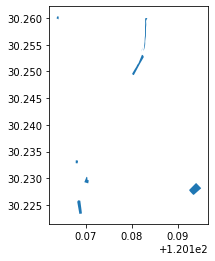

In [182]:
gdf = gdf[~gdf['geometry'].is_empty]
gdf.plot()

**把杭州市行政区划读取进来**

<AxesSubplot:>

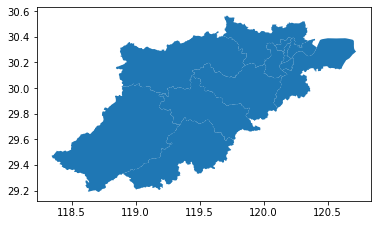

In [183]:
hzarea =gpd.read_file("F:\\study1\\研一\\兴趣面数据采集\\杭州市行政规划\\杭州市行政区划.shp") 
hzarea.plot()

In [184]:
hzarea.crs = 'epsg:4326'

<AxesSubplot:>

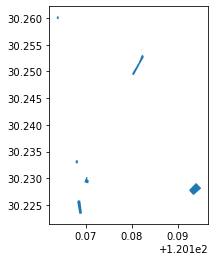

In [185]:
# 只留下在杭州市行政区内部的数据
gdf2 = gpd.sjoin(gdf, hzarea, how="inner", op='within')
gdf2 = gdf2.reset_index(drop = True )
gdf2.plot()

<AxesSubplot:>

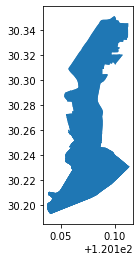

In [186]:
# 杭州太大了，因此只留下有公园数据的那些行政区
hzarea2 = gpd.sjoin(hzarea, gdf , how="inner", op='intersects')
hzarea2.plot()

In [187]:
hzarea2.unary_union.bounds

(120.137109, 30.192838, 120.213306, 30.350989)

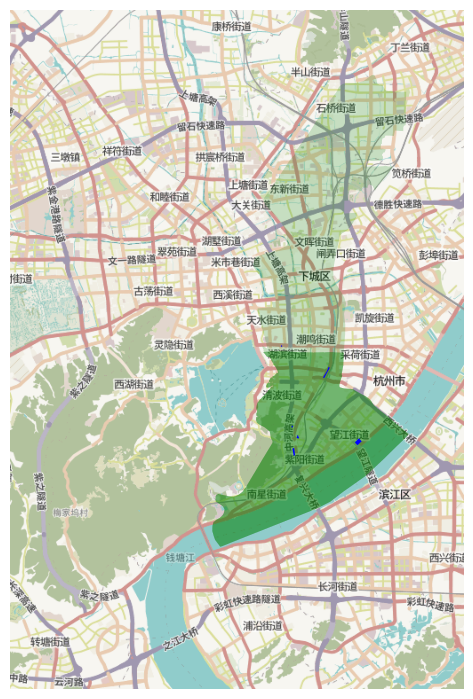

In [191]:
# 添加底图并绘图
import plot_map
from matplotlib import colors
f, ax = plt.subplots(1, figsize=(9, 9),dpi = 100)
bounds = hzarea2.unary_union.bounds
plot_map.plot_map(plt,bounds,zoom = 12,style = 3 )
hzarea2.plot( linewidth=0.1, ax=ax , alpha=0.1 , color='g')
gdf2.plot( linewidth=0, ax=ax , alpha=1 , color='b')
# grid_copy4.plot(column='change_count' , linewidth=0.1, ax=ax , alpha=0.4,legend=True)
ax.set_axis_off()
# plt.legend( ['出行占比增加','出行占比减小'])
# plt.savefig("栅格后的义乌图片.png" , dpi = 100)
plt.show()